In [23]:
import struct
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo
import math
import os
import numpy as np

In [24]:
name = 'argos.txt'
log = 'raw/' + name

df = pd.read_table(log,header = None, sep=",")
df.columns = ["ts", "type", "data"]

df['ts'] = np.where(df.index >= 3934, df['ts'] + 65536, df['ts'])
df['ts'] = np.where(df.index >= 7867, df['ts'] + 65536, df['ts'])

# Store individual dataframes
event_df = df.loc[df['type'].str.contains('EVT')]
altitude_filtered_df = df.loc[df['type'].str.contains('ALTF')]
altitude_estimation_df = df.loc[df['type'].str.contains('ALTE')]
velocity_estimation_df = df.loc[df['type'].str.contains('VELE')]

altitude_filtered_df['data'] = np.where(altitude_filtered_df['data'] < -20000, altitude_filtered_df['data'] + (65536), altitude_filtered_df['data'])
altitude_estimation_df['data'] = np.where(altitude_estimation_df['data'] < -20000, altitude_estimation_df['data'] + (65536), altitude_estimation_df['data'])


<ipython-input-24-9da32fa179b0>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-24-9da32fa179b0>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
EVENT_MAP = {
    0: 'INVALID',
    1: 'IDLE',
    2: 'DEEP_SLEEP',
    3: 'READY',
    4: 'ASCENT',
    5: 'DESCENT',
    6: 'DEPLOYMENT',
    7: 'RECOVERY',
}

def add_flight_events(fig, event_info_df):

    for _, event in event_info_df.iterrows():
        fig.add_vline(x=event['ts'], line_width=1, line_dash="dot", line_color="orange",
                          annotation_text=EVENT_MAP[event['data']], annotation_y=0.03)


def plot_data(altf_df, alte_df, vele_df, event_info_df, ret=False):
    fig_alt = go.Figure()
    fig_vel = go.Figure()
    
    fig_alt.add_scatter(x=altf_df.ts, y=altf_df['data'], name="Filtered Altitude", mode='lines')
    fig_alt.add_scatter(x=alte_df.ts, y=alte_df['data'], name="Estimated Altitude", mode='lines')
    
    fig_vel.add_scatter(x=vele_df.ts, y=vele_df['data'], name="Estimated Velocity", mode='lines')

    add_flight_events(fig_alt, event_info_df)
    add_flight_events(fig_vel, event_info_df)

    fig_alt.update_layout(
        title="Altitude",
        yaxis_title=f"Altitude (m)",
        **layout_args
    )

    fig_vel.update_layout(
        title="Velocity",
        yaxis_title="Velocity (m/s)",
        **layout_args
    )

    if ret:
        return [fig_alt, fig_vel]
    else:
        fig_alt.show()
        fig_vel.show()
        return None

In [26]:
layout_font = dict(family="Courier New, monospace", size=12)

legend = dict(orientation='h', yanchor="bottom", y=1.02, xanchor="right", x=1)

layout_args = dict(xaxis_title="Timestamp [s]",
                   template='plotly_dark',
                   legend=legend,
                   font=layout_font,
                   width=1500, height=800)

In [27]:
def scale_col(df, col, scale_factor):
    df[col] /= scale_factor

scale_col(event_df, 'ts', 1000)
scale_col(altitude_estimation_df, 'ts', 1000)
scale_col(velocity_estimation_df, 'ts', 1000)
scale_col(altitude_filtered_df, 'ts', 1000)

scale_col(altitude_filtered_df, 'data', 100)
scale_col(altitude_estimation_df, 'data', 100)
scale_col(velocity_estimation_df, 'data', 100)

<ipython-input-27-477f42a4b862>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
#Take the second index


## Generate Matplotlib Plots

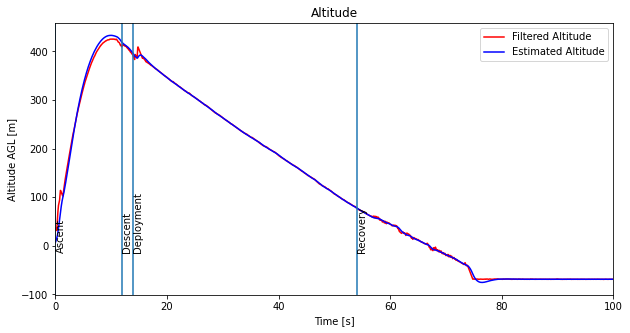

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(altitude_filtered_df['ts'], altitude_filtered_df['data'], 'r', label="Filtered Altitude")
plt.plot(altitude_estimation_df['ts'], altitude_estimation_df['data'], 'b', label="Estimated Altitude")
# plt.plot(agl_avrg, 'b', label=f"Running Avarage of {N} samples")

plt.axvline(x=event_df['ts'].iloc[0])
plt.text(event_df['ts'].iloc[0],-10,"Ascent",rotation=90)

plt.axvline(x=event_df['ts'].iloc[1])
plt.text(event_df['ts'].iloc[1],-10,"Descent",rotation=90)

plt.axvline(x=event_df['ts'].iloc[2])
plt.text(event_df['ts'].iloc[2],-10,"Deployment",rotation=90)

plt.axvline(x=event_df['ts'].iloc[3])
plt.text(event_df['ts'].iloc[3],-10,"Recovery",rotation=90)



#plt.axhline(y=100, color='r', linestyle='-')

plt.legend()

axes = plt.gca()
axes.set_xlim([0, 100])

# Add title and axis names
plt.title('Altitude')
plt.xlabel('Time [s]')
plt.ylabel('Altitude AGL [m]')

#plt.ylim((-20,agl_estimate.max()+agl_estimate.max()*0.1))
plt.savefig('altitude.pdf')
plt.show()


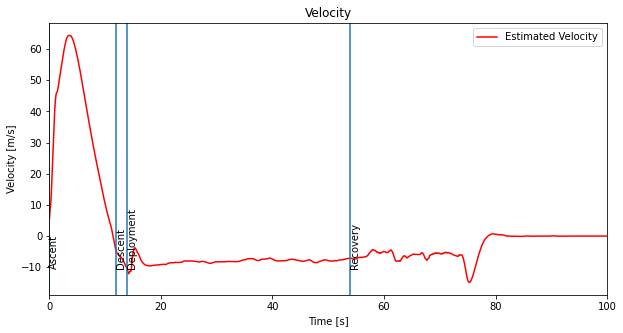

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(velocity_estimation_df['ts'], velocity_estimation_df['data'], 'r', label="Estimated Velocity")
# plt.plot(agl_avrg, 'b', label=f"Running Avarage of {N} samples")

plt.axvline(x=event_df['ts'].iloc[0])
plt.text(event_df['ts'].iloc[0],-10,"Ascent",rotation=90)

plt.axvline(x=event_df['ts'].iloc[1])
plt.text(event_df['ts'].iloc[1],-10,"Descent",rotation=90)

plt.axvline(x=event_df['ts'].iloc[2])
plt.text(event_df['ts'].iloc[2],-10,"Deployment",rotation=90)

plt.axvline(x=event_df['ts'].iloc[3])
plt.text(event_df['ts'].iloc[3],-10,"Recovery",rotation=90)



#plt.axhline(y=100, color='r', linestyle='-')

plt.legend()

axes = plt.gca()
axes.set_xlim([0, 100])

# Add title and axis names
plt.title('Velocity')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')

#plt.ylim((-20,agl_estimate.max()+agl_estimate.max()*0.1))
plt.savefig('velocity.pdf')
plt.show()

## Generate Plots

In [31]:
plot_data(altitude_filtered_df, altitude_estimation_df, velocity_estimation_df, event_df)